#Treasure Hunting Problem - Assignment 1
###Jack ODonoghue - T00194275

The aim of this algorithm is to used AI to help find the optimum treasure to take from a large hoard, based on a number of rules.

####Rules

* Max length of the total treasure: 240   
* Max weight of the total treasure: 300
* The number of items in that can fit in the knapsack is at least 10 and at most 50
* For consistancy the seed 1969 was used for random number generation. The seed number 194275 was also used. 

---













In the following two blocks of code the packages and libraries that will help to form the algorithm are downloaded/imported. 

####**Bitstring**
This package is used for easy formatting and managing of the treasure hoard and treasure items in the knapsack, in a binary format. 

####**Numpy**
Numpy is a Python library with severral use cases in science and machine learning. For the purpose of this assignment Numpy was mainly used for dealing with arrays. This includes the modification and manipulation of both existing and new arrays.

####**Deepcopy**
In Python assigning a value does not mean copying a value, i.e if a = b, and b changes, so will the value in a. To prevent this, the deepcopy method, from the copy library is used. This method creates a new object that is a copy of the referenced object. 

####**Matplotlib**
This package is used for visualising the progress of the algorithm as it iterates over generations, through the visual medium of a bar graph.

In [166]:
pip install bitstring

In [167]:
import numpy as np
from copy import deepcopy
from bitstring import BitStream, BitArray
from matplotlib import pyplot as plt 

#Treasure Hoard
A treasure hoard is the object that holds the contents of the treasure we have stumbled accross.

A number of parameters are defined here, that will limit the maximum and minimum values that can be allocated to a treasure item. 

The items within the treasure hoard are then generated and stored for future access. 

In [290]:
class treasure_hoard:
  item_count = 0
  items = []
  def __init__(self,total_item_count, seed):
    np.random.seed = seed #makes same set of numbers each time?
    self.max_value = np.random.randint(50,100)
    self.min_value = np.random.randint(0,3)
    self.max_length = np.random.randint(3,10)
    self.min_length = np.random.randint(1,3)
    self.max_weight = np.random.randint(3,20)
    self.min_weight = np.random.randint(1,3)

    for _ in range(total_item_count):
      self.items.append(treasure_item(self.max_value,self.max_length,self.max_weight,min_value=self.min_value, min_length= self.min_length, min_weight=self.min_weight))
  def display(self):
    print( "max value: " + str(self.max_value) + ", " +  str(self.min_value) + "\n" + "max length: " + str(self.max_length) + ", " +  str(self.min_length) + "\n" + "max weight: " + str(self.max_weight) + ", " +  str(self.min_weight))

#Treasure Item
A treasure item is a single unit of treasure. A treasure item has three characterisitics, value, weight, and length. The maximum/minimums allowed in these fields are defined in the Treasure Hoard class.

In [291]:
class treasure_item:
  value = 0
  length = 0
  weight = 0
  def __init__(self, max_value,max_length, max_weight,min_value = 0, min_length = 1, min_weight = 1):
    self.value = np.random.randint(min_value,max_value)
    self.length = np.random.randint(min_length,max_length)
    self.weight = np.random.randint(min_weight,max_weight)

  def display(self):
    print("Item Value "+ str(self.value) + " length " + str(self.length) + " weight " + str(self.weight))


#Problem 
This class defines many parameters of this assignment.

The problem also defines the fitness function used in this program. The goal here is to maximise the value of the treasure in the knapsack. There are certain restraints due to the limitations of the knapsack, which are enforced within this function. If the items in the knapsack are too great in weight, length or amount the knapsack is rejected, shown by the "treasure items incompatable with knapsack" message. If the values are within the bounds of the application, the value is returned.  

The number of items that are up for possible addition to the knapsack is defined here. This number may vary. 

In [292]:
class problem(): 
  total_value = 0
  total_length = 0
  total_weight = 0
  fitness_to_weight_length_ratio = 0

  def __init__(self):
    self.max_items = 50
    self.min_items = 10 
    self.max_length = 240
    self.max_weight = 300
    self.number_of_treasure_items = 100

  def fitness_function(self, items, treasure):
    self.total_value, self.total_length, self.total_weight = totals_in_knapsack(items, treasure)
    if (self.total_length < self.max_length) and (self.total_weight <= self.max_weight) and (items.bin.count("1")<= 50 and items.bin.count("1") >= 10):
      self.fitness_to_weight_length_ratio = self.total_value/(self.total_weight+self.total_length)
      return (self.total_value, self.fitness_to_weight_length_ratio)
    else:
      return "treasure items incompatable with knapsack"

#Parameters
Parameters for the algorithm are defined here. These values may be changed before runtime, based on research and experience. 

Many different crossover_rate and mutation_rate were chosen but the original values of 0.5 and 0.05 worked best.

The number in population was increased from 100 to 500 but there wasn't that much of a difference.

The number of iterations was increased to 700 as after testing it was discovered that after about 200 the best solution leveled off but sometimes it kept increasing until 600+ iterations. 


In [293]:
class parameters:
  def __init__(self):
    self.number_in_population = 500
    self.number_of_iterations = 700

    #children
    self.child_rate = 1
    self.number_of_children = self.number_in_population * self.child_rate

    #tournament selection parameters
    self.competitors_per_match = 3
    self.matches_per_round = 9

    #Crossover Rate
    self.crossover_rate = 0.5
    self.crossover_explore_rate = 0.5

    #Mutation parameters
    self.mutation_rate = 0.05
    self.mutation_range = 0.5

    #Explore exploit
    self.explore_exploit = .5

#Totals in knapsack
This function is used in conjunction with the fitness function of the problem class. It's goal is to tally up the totals in terms of weight, value, and length, for a select amount of treasure items. These values are then returned.  

In [294]:
def totals_in_knapsack(items, treasure):
  value = 0
  length = 0
  weight = 0

  for i in range(len(items)):
    if items[i] is True:
      value += treasure.items[i].value
      length += treasure.items[i].length
      weight += treasure.items[i].weight
  return value, length, weight

#Individual
An individual is a knapsack. it is the contents of one set of treasure taken from the hoard. An individual has a chromosone, which contains the list of items taken from the hoard. Treasure items are stored in the chromosone, meaning they roughly translate to a gene

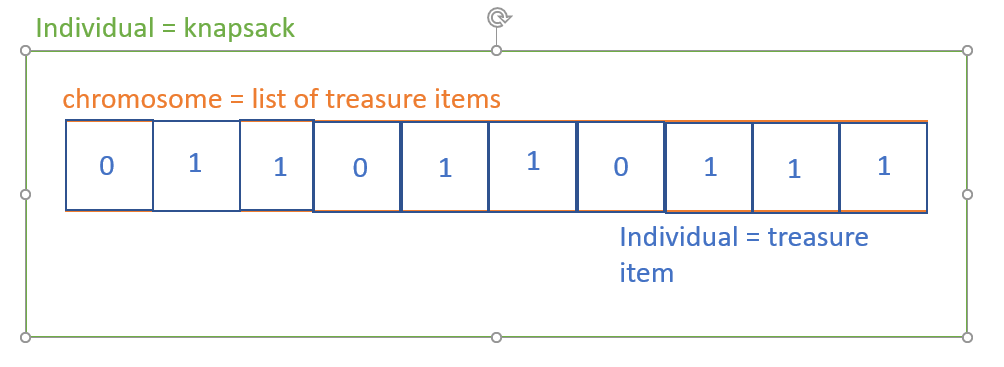

##Crossover
The crossover occurs when two parents of provide a portion of each of their chromosome to the child. This happens at a probability decided before runtime. Once the probability has been met, the crossover occurs. 

I also tried crossover with two points. This can be seen in the code with an added random value 'beta' and an adjusted crossover formula beneath

This algorithm used one point of crossover at first. Example shown below:
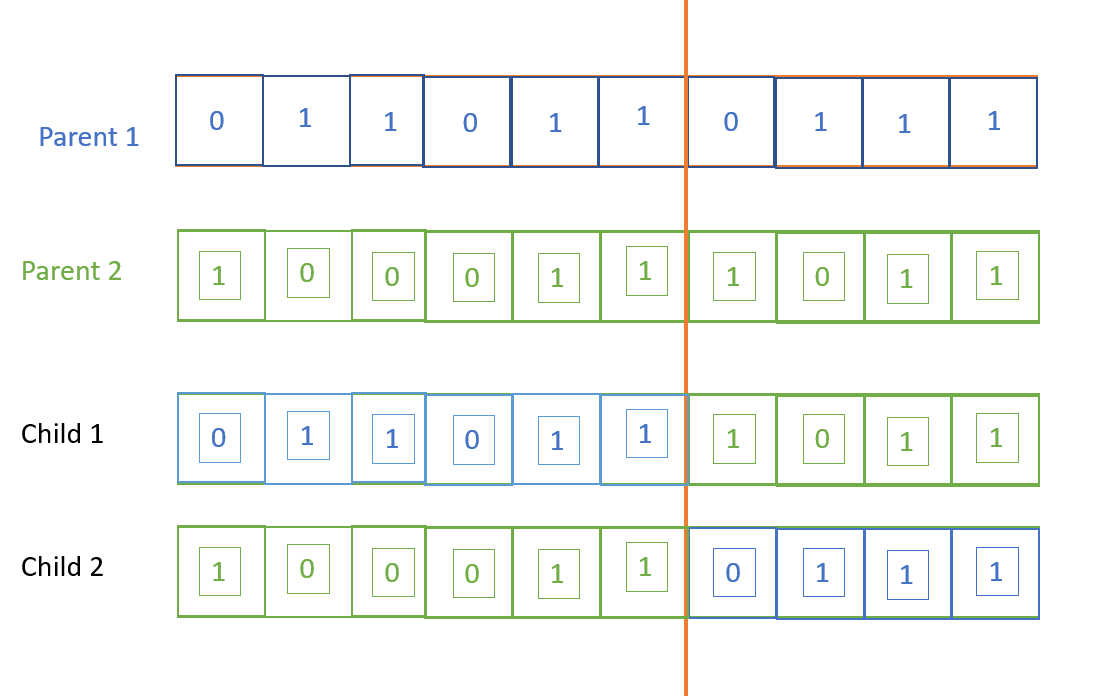

Crossovers may occur to different degrees, in that the probability of it occuring may change. Furthermore, the number of points for the crossover may change too. 

##Mutation
Mutation, like crossover, relies on a probability defined before the program is run. A mutation occurs when a bit is flipped in the chromosome. This means a different treasure item is added to the knapsack. Since Bitstring uses strings to hold the binary values, flipping a bit involves converting to an int, then a boolean. The item can then be changed and converted back to the string and returning an mutated version of the chromosome.



In [295]:
#individual set for knapsack
class individual():
  #items
  chromosone = None

  fitness = 0
  fitness_to_weight_length_ratio=0

  prob = None

  #constructor
  def __init__(self, problem = problem()):
    self.prob = problem
    self.chromosone = BitArray(bin = '0'*self.prob.number_of_treasure_items)

    if problem is not None:
      for _ in range(np.random.randint(low=self.prob.min_items, high=self.prob.max_items)):
        self.chromosone[np.random.randint(self.prob.number_of_treasure_items)] = True
        values = self.prob.fitness_function(self.chromosone, treasure) 
        self.fitness = values[0] 
        self.fitness_to_weight_length_ratio = values[1]

  def crossover(self, other_parent, explore_rate):
    child1 = deepcopy(self)
    child2 = deepcopy(other_parent)
    alpha = np.random.randint(self.prob.number_of_treasure_items)
    #child1.chromosone = self.chromosone[0:alpha] + other_parent.chromosone[alpha:self.prob.number_of_treasure_items]
    #child2.chromosone = other_parent.chromosone[0:alpha] + self.chromosone[alpha:self.prob.number_of_treasure_items]
    beta = np.random.randint(alpha, self.prob.number_of_treasure_items)
    child1.chromosone = self.chromosone[0:alpha] + other_parent.chromosone[alpha:beta] + self.chromosone[beta:self.prob.number_of_treasure_items]
    child2.chromosone = other_parent.chromosone[0:alpha] + self.chromosone[alpha:beta] + other_parent.chromosone[beta:self.prob.number_of_treasure_items]
    
    return child1, child2

  def mutate(self, mutation_rate, mutation_range):
    item_list = list(self.chromosone.bin)
    for i in range(len(item_list)):
      if np.random.rand()<mutation_rate:
        item_list[i] = str(int(not bool(int(item_list[i])))) 
    self.chromosone.bin = "".join(item_list)

#**Parent Selection**
There are three types of parent selection defined for this assignment, namely roulette, tournament, and random. They are explained in the next three cells.

##Random
In random parent selection an index for each parent is determined by a pseudo-random integer using Numpy. Once the index's are not the same, the index's are returned.  

In [296]:
def choose_distinct_pair_from(number_in_pop):
  index1 = np.random.randint(number_in_pop)
  index2 = np.random.randint(number_in_pop)
  if index1 == index2:
    return choose_distinct_pair_from(number_in_pop)
  else:
    return index1,index2

##Roulette
The roulette selection is created by assigning a probability of a population member being chosen based on it's fitness. An item with a higher fitness is likely to be chosen over an item with lower fitness. These probabilities are assigned proportianatily to the fitness of the item. 

In this function the fitness of each item is calculated and all are added to an array. Then, an array containing the cumulative total at each index is created. After this, a random index is chosen, within the range of the sum of all fitnesses. This is the number to be chosen. The argwhere method will show all of the items where the cumulative total is less than the random number chosen. The first item in this arrray is the index. 

e.g. 

chance chosen:    |--.21--|---.28---|--.21--|---.28---|  
cumulative total: |---3---|----7----|--10---|----14---|
    

* cumulative totals: [3,7,10,14]
* random index = 9
* argwhere = [7, 3]
* index = 7 

    
     
     

In [297]:
#parent selection enhancement
def roulette_wheel_index_selection(pop):
  fitness_array = []
  
  for i in range(len(pop)):
    fitness_array.append(pop[i].fitness)

  cumulative_total_array = np.cumsum(fitness_array)
  parent1_from_cumulative_total_array = sum(fitness_array) * np.random.rand()
  parent2_from_cumulative_total_array = sum(fitness_array) * np.random.rand()
  
  index1 = np.argwhere(parent1_from_cumulative_total_array <= cumulative_total_array)
  index2 = np.argwhere(parent2_from_cumulative_total_array <= cumulative_total_array)
    
  if index1[0][0] != index2[0][0]:
    return index1[0][0], index2[0][0]
  else:
     return roulette_wheel_index_selection(pop)

##Tournament 
In this selection type a starting number of individuals are chosen for each match. They will compete to see who has the highest score. The number of matches for the first round  are also chosen. These two factors decide how many individuals are used in the tournamemt and are chosen at random.

Then there is a while loop, which iterates until there is only one remaining individual (len(contestants) = 1).

The contestants are sub-divided into competitor arrays. The length is that which is defined when the function is called. These lists are then sorted, based on value, with the winners moving to the next round by getting added to the winners list. This continues until there is one winner.

e.g.  
beginning with [4,5,2,7,3,8,1] and a match size of 2:  
contestants = [[4,5],[2,7],[3,8],[1]]  
winners=[5,7,8,1]  
contestants=[[5,7],[8,1]]  
winners=[7,8]  
contestants=[[7,8]]  
winners=[8]  
tournament finished, winner = 8

###Adjustment
For experimentation, I changed the value that would win the tournament from fitness to fitness to weight and length ratio. (fitness/(weight+length))
The best solution in the main function is still the best fitness. -- It didn't work 

In [298]:
def tournament_selection(pop, competitors_per_match, matches_per_round):
  #get indexes for individual contestants
  parent1_sample = np.random.randint(low=0, high=len(pop), size=competitors_per_match*matches_per_round).tolist()
  parent2_sample = np.random.randint(low=0, high=len(pop), size=competitors_per_match*matches_per_round).tolist()

  parent1_contestants=[]
  parent2_contestants=[]
  #get contestants
  for k in range(len(parent1_sample)):
    parent1_contestants.append(pop[parent1_sample[k]])
    parent2_contestants.append(pop[parent2_sample[k]])
  
  #go until there's a winner
  while len(parent1_contestants) != 1:#len(competitors)
    #each rounds winners
    parent1_winners=[]
    parent2_winners=[]
    #competitors for each round
    parent1_competitors=[]
    parent2_competitors=[]
    #split into size rounds
    for i in range(0, len(parent1_contestants), competitors_per_match):
      parent1_competitors.append(parent1_contestants[i:i+competitors_per_match])
      parent2_competitors.append(parent2_contestants[i:i+competitors_per_match])
    #sort
    for j in range(len(parent1_competitors)):
      #get winner 
      parent1_winners.append(sorted(parent1_competitors[j], key = lambda x:x.fitness, reverse=True)[0])
      parent2_winners.append(sorted(parent2_competitors[j], key = lambda x:x.fitness, reverse=True)[0])
  
    #winners of each round become contestants
    parent1_contestants=parent1_winners
    parent2_contestants=parent2_winners

  parent1=parent1_contestants[0]
  parent2=parent2_contestants[0]

  if parent1 != parent2:
    return parent1, parent2
  else:
    return tournament_selection(pop, competitors_per_match, matches_per_round)

In [299]:
def run_genetic(problem, parameters):
  fitness = []

  #read problem 
  fitness_function = problem.fitness_function

  #read parameters
  number_in_population = parameters.number_in_population
  number_of_iterations = parameters.number_of_iterations
  number_of_children = parameters.number_of_children
  crossover_rate = parameters.crossover_rate
  crossover_explore_rate = parameters.crossover_explore_rate
  mutation_rate = parameters.mutation_rate
  mutation_range = parameters.mutation_range
  explore_exploit = parameters.explore_exploit
  competitors_per_match = parameters.competitors_per_match
  matches_per_round = parameters.matches_per_round


  #placeholder for best case
  best_solution = deepcopy(individual())
  best_solution.fitness = 0
  best_solution.fitness_to_weight_length_ratio=0

  population = []
  fitnesses = []
  while len(population) <= number_in_population:
    new_individual = individual(problem)
    if isinstance(new_individual.fitness, (int)):
      population.append(new_individual)
      fitnesses.append(new_individual.fitness)

      if new_individual.fitness > best_solution.fitness:
        best_solution = deepcopy(new_individual)
  population = sorted(population, key = lambda x:x.fitness, reverse=True)
  fitnesses = sorted(fitnesses, reverse=True)

  for i in range(number_of_iterations):
    children = []
    #generate childs
    while len(children) <= number_of_children:

      #select parents - random 
      #parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
      parent1_index, parent2_index = roulette_wheel_index_selection(population)
      #parent1, parent2 = tournament_selection(population, competitors_per_match, matches_per_round)

      parent1 = population[parent1_index]
      parent2 = population[parent2_index]

      #crossover
      child1, child2 = parent1.crossover(parent2, crossover_explore_rate)
      
      #mutate
      child1.mutate(mutation_rate, mutation_range)
      child2.mutate(mutation_rate, mutation_range)
      values = fitness_function(child1.chromosone, treasure)
      child1.fitness = values[0]
      child1.fitness_to_weight_length_ratio = values[1]
      values = fitness_function(child2.chromosone, treasure)
      child2.fitness = values[0]
      child2.fitness_to_weight_length_ratio = values[1]
      if isinstance(child1.fitness, (int)):
        children.append(child1)
      if isinstance(child2.fitness, (int)):
        children.append(child2)  
    # Add children to population
    population += children


    # sort/reduce population to correct level
    population = sorted(population, key = lambda x:x.fitness, reverse=True)[:number_in_population]
    
    if population[0].fitness > best_solution.fitness:
      best_solution = deepcopy(population[0])
      

    fitness.append(best_solution.fitness)

    #crossover_explore_rate *= explore_exploit
   # mutation_rate *= explore_exploit
#    mutation_range *= explore_exploit


  return best_solution, number_of_iterations, fitness 


In [300]:
prob = problem()
params = parameters()

In [301]:
treasure = treasure_hoard(500, 194275)

In [302]:
best_soln, num_iterations, fitness = run_genetic(prob, params)

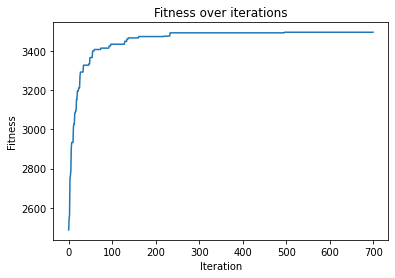

Best Solution: 3495


In [303]:
#random parent selection - value based fitness function 

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

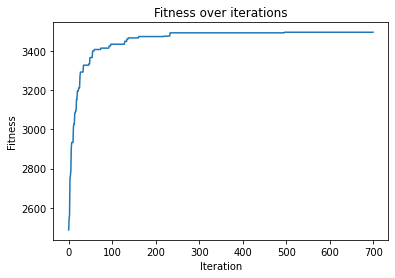

Best Solution: 3495


In [304]:
#random parent selection - value based fitness function 

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

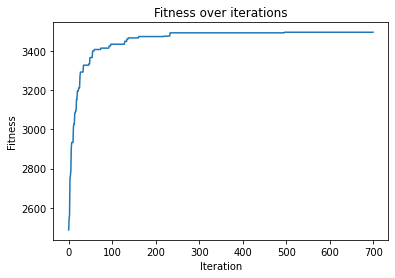

Best Solution: 3495


In [305]:
#tournament parent selection - value based fitness function 
#crossover and mutation changed from 0.5 and 0.05, to 0.3 and 0.2 respectively

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

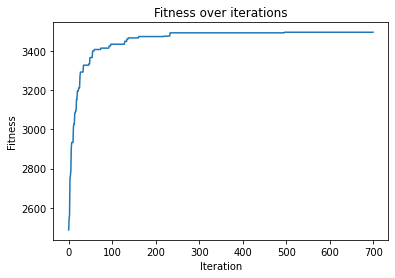

Best Solution: 3495


In [306]:
#tournament parent selection - value based fitness function 
#crossover and mutation changed to 0.7 and 0.3 respectively

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

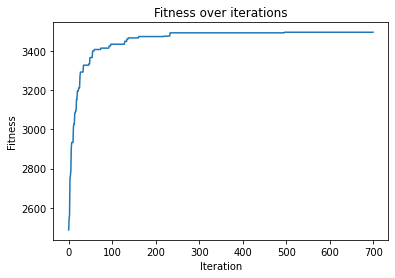

Best Solution: 3495


In [307]:
#tournament parent selection - value based fitness function 
#crossover and mutation changed to 0.3 and 0.3 respectively

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

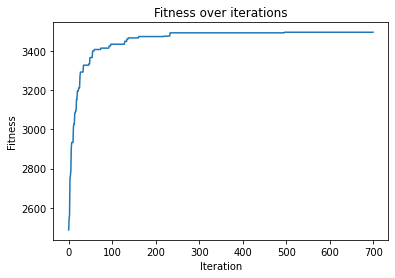

Best Solution: 3495


In [308]:
#roulette parent selection - value based fitness function 
#crossover rate=0.5
#mutation rate = 0.05

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

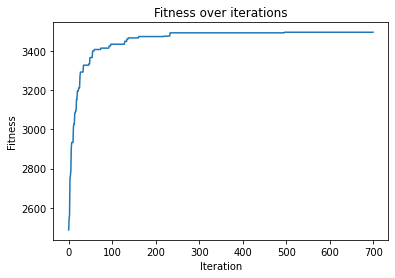

Best Solution: 3495


In [309]:
#roulette parent selection - value based fitness function 

#crossover and mutation changed to 0.5 and 0.1 respectively
#starting with a larger population. this time 1000
x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

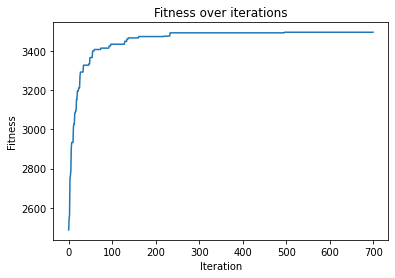

Best Solution: 3495


In [310]:
#random parent selection - value based fitness function 

x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

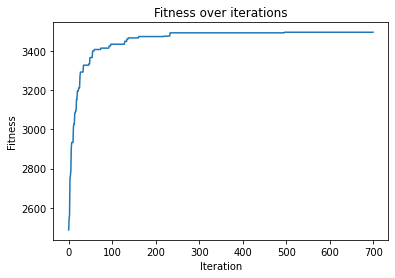

Best Solution: 3495


In [311]:
#random parent selection - value based fitness function 
#ITERS = 2000
#POP = 1000 
x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

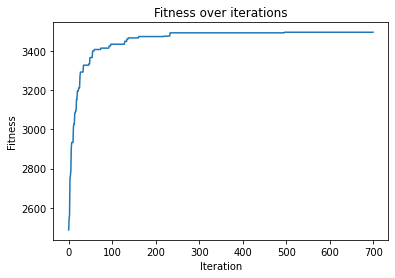

Best Solution: 3495


In [312]:
#random parent selection - value based fitness function 
#ITERS = 700
#POP = 500
#double crossover
x = np.arange(num_iterations)
y = np.array(fitness)
plt.title("Fitness over iterations") 
plt.xlabel("Iteration") 
plt.ylabel("Fitness") 
plt.plot(x,y) 
plt.show()
print("Best Solution: " + str(best_soln.fitness))

In [313]:
competitors_per_round=2
number_of_rounds=17
sample = np.random.randint(low=1, high=100, size=number_of_rounds*competitors_per_round).tolist()
no_rounds=0

print("sample: " + str(sample))
while len(sample) != 1:#len(competitors)
  no_rounds+=1
  winners=[]
  competitors=[]
  #split
  for i in range(0, len(sample), competitors_per_round):
    competitors.append(sample[i:i+competitors_per_round])
  #sort
  for j in range(len(competitors)):
    #get winner 
    winners.append(sorted(competitors[j], reverse=True)[0])
  
  print("competitors: " + str(competitors))
  print("winners: " + str(winners))
  sample=winners 
  print("rounds: " + str(no_rounds))

sample: [18, 52, 79, 60, 89, 57, 65, 55, 84, 4, 34, 49, 46, 92, 71, 98, 53, 9, 74, 6, 63, 47, 93, 32, 98, 14, 23, 93, 7, 50, 70, 44, 87, 31]
competitors: [[18, 52], [79, 60], [89, 57], [65, 55], [84, 4], [34, 49], [46, 92], [71, 98], [53, 9], [74, 6], [63, 47], [93, 32], [98, 14], [23, 93], [7, 50], [70, 44], [87, 31]]
winners: [52, 79, 89, 65, 84, 49, 92, 98, 53, 74, 63, 93, 98, 93, 50, 70, 87]
rounds: 1
competitors: [[52, 79], [89, 65], [84, 49], [92, 98], [53, 74], [63, 93], [98, 93], [50, 70], [87]]
winners: [79, 89, 84, 98, 74, 93, 98, 70, 87]
rounds: 2
competitors: [[79, 89], [84, 98], [74, 93], [98, 70], [87]]
winners: [89, 98, 93, 98, 87]
rounds: 3
competitors: [[89, 98], [93, 98], [87]]
winners: [98, 98, 87]
rounds: 4
competitors: [[98, 98], [87]]
winners: [98, 87]
rounds: 5
competitors: [[98, 87]]
winners: [98]
rounds: 6


#Best Result - Seed: 1969 - 3014

random selection  
mutation rate - 0.05  
crossover rate - 0.5  
double crossover

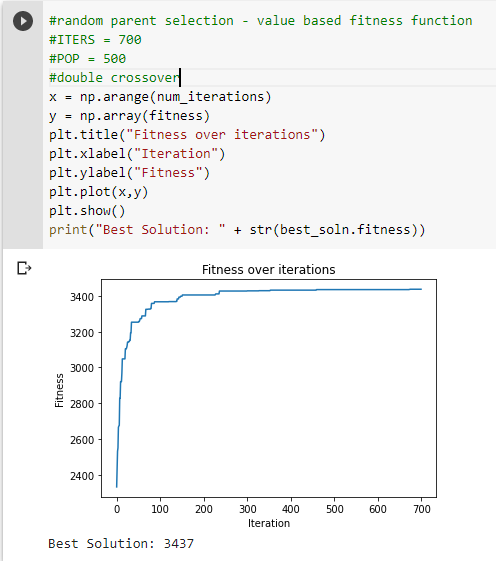





#Best Result - T-Number -
same inputs as above

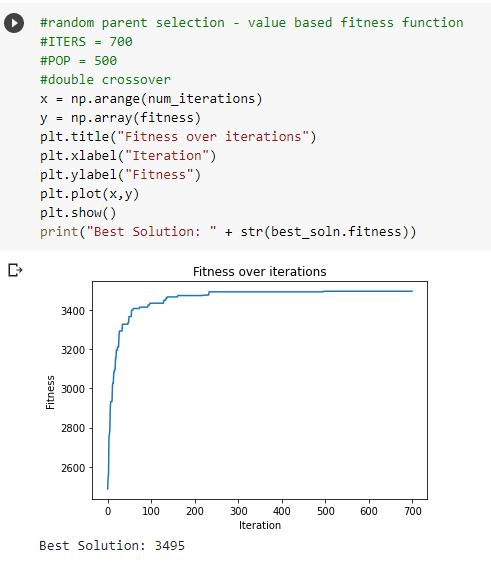